# Project: Breast Cancer Classification

**In this project, I will be using several Python libraries to construct a K-Nearest Neighbor classifier that is trained to predict whether a patient has breast cancer given data pulled from sklearn.**


Let’s begin by importing the breast cancer data from sklearn. We can do so by importing 'load_breast_cancer' from 'sklearn.datasets'.

After that, let’s load the data into a variable called breast_cancer_data. We do this by setting breast_cancer_data equal to the function load_breast_cancer( ).

In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()


Before we get to making our classifier, let's look at the data's structure and understand how we can retrieve information. We do so by printing breast_cancer_data.data[0]. This provides the first datapoint in our set. But this is just a list of numbers, let's see what features those numbers represent by also printing breast_cancer_data.feature_names.

In [ ]:
print(breast_cancer_data.data[0])  # To see the first datapoint in our set
print(breast_cancer_data.feature_names) # To see what each value in the first print statement represents

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Cool! We know what the data looks like, but what are we trying to classify? Let’s print both breast_cancer_data.target and breast_cancer_data.target_names.

We see below that a 0 represents a 'malignant' tumor while a 1 represents 'benign'. 

In [ ]:
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

**Splitting the data into Training and Validation Sets**

We have our data, so our next step is split it into training and validation sets. Luckily, sklearn has a function that does that for us. Let's import the train_test_split function from sklearn.model_selection.

In [ ]:
from sklearn.model_selection import train_test_split

The train_test_split function uses several parameters to work.

The parameter order goes:
1. The data we're about to split (for us breast_cancer_data.data)
2. The respective labels for the data (for us, breast_cancer_data.target)
3. The test_size. This is what percentage of your data you want to be in your testing set. Let’s use test_size = 0.2
4. random_state. This will ensure that every time you run your code, the data is split in the same way. This can be any number. We used random_state = 100.

In [ ]:
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, train_size = 0.8, test_size = 0.2, random_state = 100)


Let's see if that worked the way we intended by printing out the length of training_data and training_labels. They should be the same size, as there should be one label for every piece of data.

In [ ]:
print(len(training_data))
print(len(training_labels))

455
455


Now that we’ve created training and validation sets, we can create a KNeighborsClassifier and test its accuracy. Let's importing KNeighborsClassifier from sklearn.neighbors, then create a KNeighborsClassifier where n_neighbors = 3. Name the classifier classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)

We now train the classifier using the fit function. This function takes two parameters: the training set and the training labels.

In [ ]:
classifier.fit(training_data, training_labels)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Now that the classifier has been trained, let’s find how accurate it is on the validation set by calling and printing the classifier’s score function. score takes two parameters: the validation set and the validation labels.




In [ ]:
print(classifier.score(validation_data, validation_labels))

0.9473684210526315


The classifier does pretty well when k = 3. But maybe there’s a better k! Let's plot it out as we range the k values from 1 to 100 and finding the validation accuracy. We should now see 100 different validation accuracies in a graph and be able to determine the best K value. 

In [ ]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show>

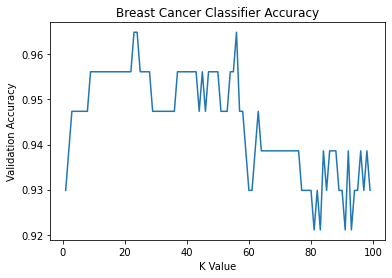

In [ ]:
x_axis = []
y_axis = []

for k in range(1,100,1):
  x_axis.append(k)
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  y_axis.append(classifier.score(validation_data, validation_labels))

plt.plot(x_axis, y_axis)
plt.xlabel("K Value")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show

It seems a K value around 21 does best!